# Loading Data

In [ ]:
import pandas as pd
import numpy as np

reviews_df = pd.read_csv("//content//reviews_badminton_data.csv")

# Display the first few rows of the dataset

In [ ]:
reviews_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:", reviews_df.shape)

# Check for missing values
print("\nSummary for missing values:\n", reviews_df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", reviews_df.describe())


Shape of the dataset: (8518, 8)

Summary for missing values:
 Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

Summary statistics:
           Up Votes   Down Votes      Ratings
count  8508.000000  8508.000000  8518.000000
mean      0.391396     0.121768     4.181028
std      11.613909     3.248022     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


# Unique values for categorical columns

In [ ]:
print("\nUnique values in categorical columns:")
for col in reviews_df.select_dtypes(include=['object']).columns:
    print(col, ":", reviews_df[col].nunique())



Unique values in categorical columns:
Reviewer Name : 6243
Review Title : 194
Place of Review : 2337
Month : 80
Review text : 4983


In [ ]:
reviews_df['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [ ]:
reviews_df['Ratings'].value_counts(normalize=True)

5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: Ratings, dtype: float64

<ipython-input-7-b8db1b6ec081>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Ratings', data=reviews_df, palette='viridis')


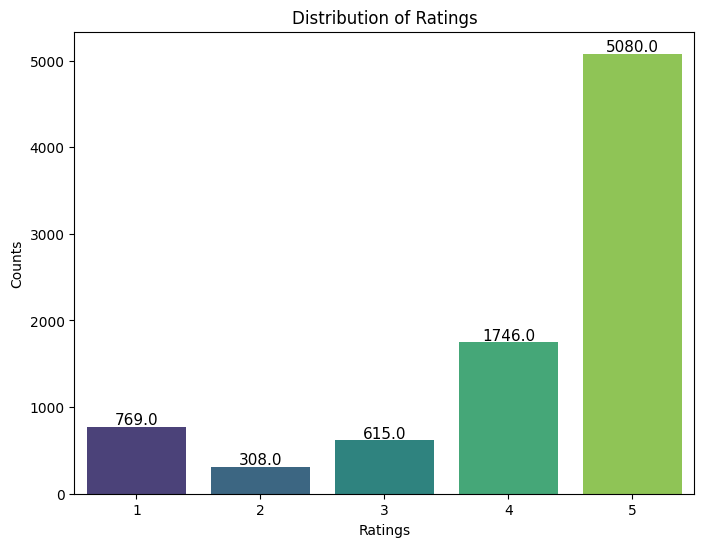

In [ ]:
# Distribution of ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax=sns.countplot(x='Ratings', data=reviews_df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Counts")

# Add annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

In [ ]:
reviews_df['Ratings'] = np.where((reviews_df['Ratings'] < 3), 0, reviews_df['Ratings'])
reviews_df['Ratings'] = np.where((reviews_df['Ratings'] >= 3), 1, reviews_df['Ratings'])


In [ ]:
reviews_df.head()


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",1
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,0


In [ ]:
print(reviews_df.isna().sum())


Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [ ]:
columns_to_drop = ['Month', 'Place of Review', 'Reviewer Name']
reviews_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
numeric_columns = ['Up Votes', 'Down Votes']


In [ ]:
median_values_subset = reviews_df[numeric_columns].median()


In [ ]:
reviews_df[numeric_columns] = reviews_df[numeric_columns].fillna(median_values_subset)


In [ ]:
reviews_df.dropna(inplace=True)

In [ ]:
print(reviews_df.isnull().sum())


Review Title    0
Up Votes        0
Down Votes      0
Review text     0
Ratings         0
dtype: int64


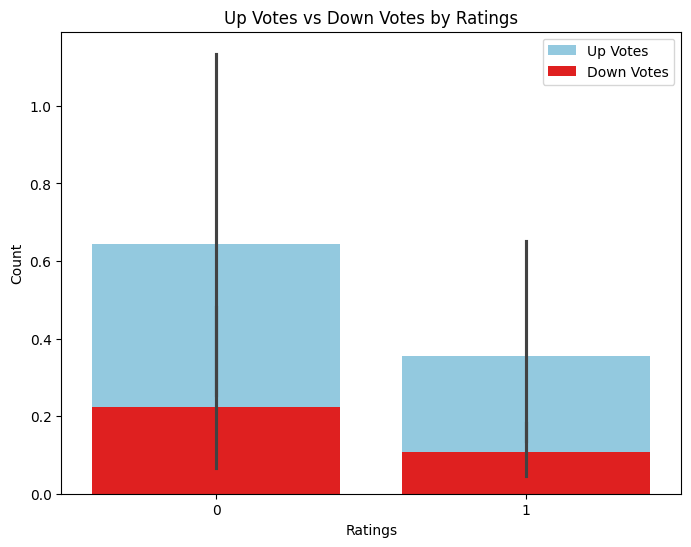

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot for Up Votes and Down Votes
sns.barplot(x='Ratings', y='Up Votes', data=reviews_df, color='skyblue', label='Up Votes')
sns.barplot(x='Ratings', y='Down Votes', data=reviews_df, color='red', label='Down Votes')

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Up Votes vs Down Votes by Ratings')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'reviews_df' is your DataFrame containing the reviews data
X = reviews_df[['Review text']]  # Independent variable(s)
y = reviews_df['Ratings']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6806, 1)
X_test shape: (1702, 1)
y_train shape: (6806,)
y_test shape: (1702,)


In [ ]:
import re

# Function to find emojis in text
def find_emojis(text):
    # Define regex pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

# Apply the function to find emojis in each review text
reviews_df['Emojis'] = reviews_df['Review text'].apply(find_emojis)

# Display reviews containing emojis
reviews_with_emojis = reviews_df[reviews_df['Emojis'].apply(len) > 0]
print("Reviews containing emojis:")
print(reviews_with_emojis[['Review text', 'Emojis']])


Reviews containing emojis:
                                            Review text        Emojis
14    really satisfied with the quality and the prom...           [👍]
55                       Low quality very bad quality 😡           [😡]
69                                   Very bad quality 👎           [👎]
88                                          it's awsm 😎           [😎]
103   This shuttle is the best one, it is excellent ...           [👍]
...                                                 ...           ...
8045                            Met the expectations 👌👌          [👌👌]
8117                                   Good quality...👌           [👌]
8138                        very bad quality 👎👎👎👎👎👎👎👎👎👎  [👎👎👎👎👎👎👎👎👎👎]
8234                        Best quality at best price👌           [👌]
8313                    Superb quality as aspected... 👍           [👍]

[249 rows x 2 columns]


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# The inflect library and demonstrate its usage for pluralizing words.

!pip3 install inflect
import inflect
p=inflect.engine()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
import string

In [ ]:
# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_review(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove emojis from the text
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove emails from the text
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Remove digits from the text
    text = re.sub(r'\d+', '', text)

    # Remove all alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove 'read' with or without spaces
    new_tokens = [token for token in tokens if token.lower()]

    # Handle 'not' and the following token together
    final_tokens = []
    i = 0
    while i < len(new_tokens):
        if new_tokens[i] == 'not' and i < len(new_tokens) - 1:
            final_tokens.append(f'not {new_tokens[i + 1]}')
            i += 1  # Skip the next token
        else:
            final_tokens.append(new_tokens[i])
        i += 1

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in final_tokens if token.lower() not in stop_words]

    # Join the lemmatized tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

# Apply the preprocess_review function to each row of the DataFrame
# X_train['Cleaned Review Title'] = X_train['Review Title'].apply(preprocess_review)
X_train['Cleaned Review Text'] = X_train['Review text'].apply(preprocess_review)

X_train.head()


,Review text,Cleaned Review Text
1372,Very good.,good
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...
333,Nice product. .,nice product
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...
3532,Better,better


In [ ]:
print(reviews_df.isnull().sum())


Review Title    0
Up Votes        0
Down Votes      0
Review text     0
Ratings         0
Emojis          0
dtype: int64


In [ ]:
X_train.columns

Index(['Review text', 'Cleaned Review Text'], dtype='object')

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
y_train

1372    1
3846    0
333     1
1259    0
3532    1
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: Ratings, Length: 6806, dtype: int64

In [ ]:
y_train.value_counts()

1    5946
0     860
Name: Ratings, dtype: int64

In [ ]:
negative_df = X_train.loc[y_train==0,:]
negative_df.head()

,Review text,Cleaned Review Text
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...
3098,It's really disappointing 😞 . 1 shuttle lasts ...,really disappoint shuttle last hard practice m...
351,Easily got damaged,easily get damage
7382,Looks not genuine,look not genuine


In [ ]:
words = ' '.join(negative_df['Cleaned Review Text'])
print(words[:1000])

purchase shuttle flipkart long time quality shuttle lack recently may not buy anymore due lack quality worst recent time play new ball today two ball bottom tape go within hours attach image last two delivery worst intermediate players play double single ball stand atleast two day last two delivery whole ball damage within days really disappoint shuttle last hard practice match instead practice match poor easily get damage look not genuine nice waste product suggest people not bay flipkart atom miss felt difference shuttle quality compare offline store doubt product authenticity bad life tear easily bottom cork lot hole easily get damage match not worth even single star quality not good expect haamaare yaha local market main yahi shuttle per set box mein mil rha hain toh aapke yaha se kyun lunga nahi saahiye ok itna mahanga shuttle wast good bad quality quality shuttle seem bad didnt even last game change two shuttle hours play box box bad shuttle shuttle box not playable poor quality 

In [ ]:
cleaned_negative_words = " ".join([word for word in words.split()
                                if 'subject not in word'])


In [ ]:
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                               background_color="black",
                               width=1400,height=600).generate(cleaned_negative_words)

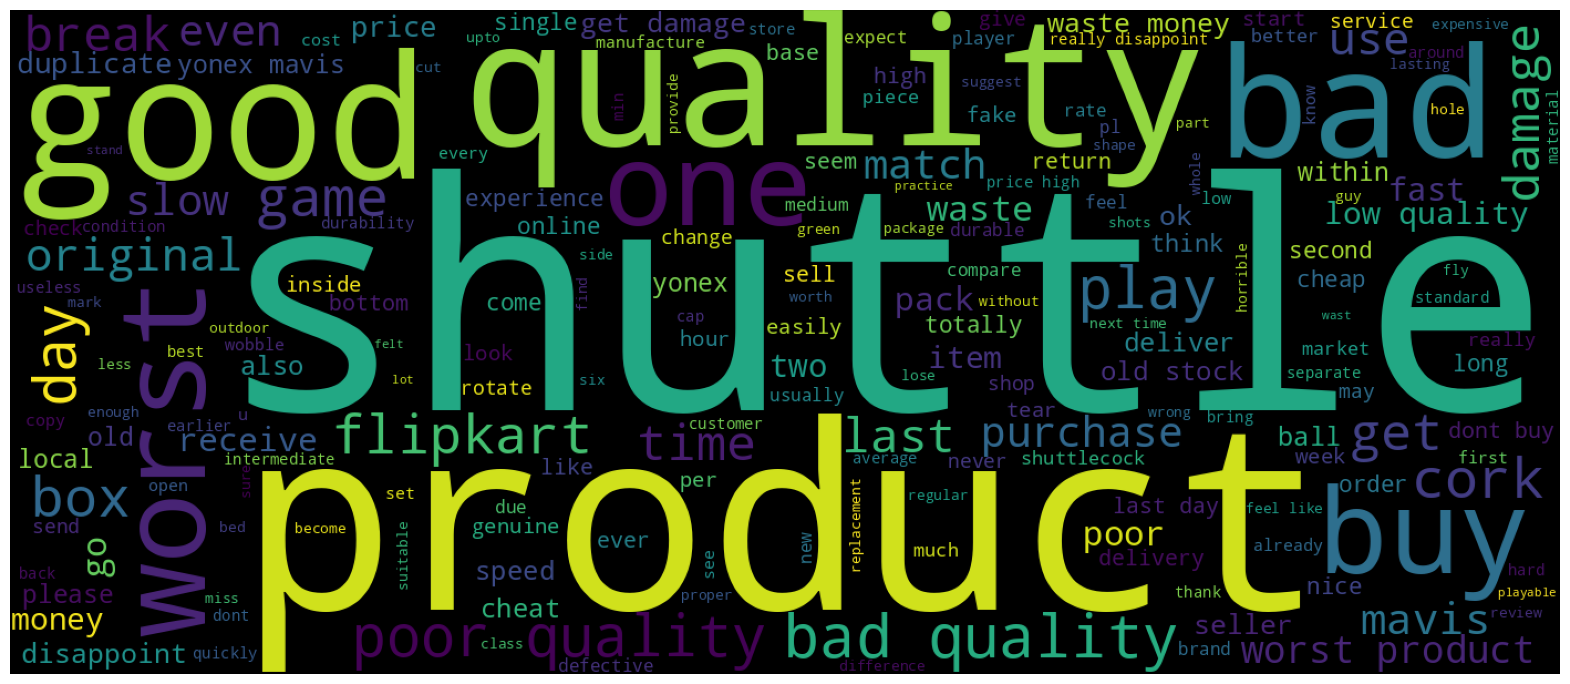

In [ ]:
plt.figure(1,figsize=(20,15))
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
positive_df = X_train.loc[y_train==1,:]
positive_df.head()

,Review text,Cleaned Review Text
1372,Very good.,good
333,Nice product. .,nice product
3532,Better,better
5707,good,good
1024,Good,good


In [ ]:
words = ' '.join(positive_df['Cleaned Review Text'])
print(words[:1000])

good nice product better good good best budget super product expect one satisfy delivery order night receive product hand next day seller quick delivery nice one value money buy happy excellent deal value worth ok ok good performance not very good genuine product reasonable price good see days value money importantly original superb quality nice super fantastic product absolutely amaze price speedy delivery within days doorstep good best choice indian condition last longer beginners intermediate players always receive original product flipkart super super product last years good productgood cover product good manufacturers date august awesome deal awesome price love excellent nice good product really good thank good compare shuttle good product good product thnx flipcart not bad work well door game flipkart service good product quality not good damage bottom cork waste buy buy time cork worst broked match good good suttal good get market price good product original yonex great value mo

In [ ]:
cleaned_positive_words = " ".join([word for word in words.split()
                                if 'subject not in word'])


In [ ]:
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                               background_color="black",
                               width=1400,height=600).generate(cleaned_positive_words)

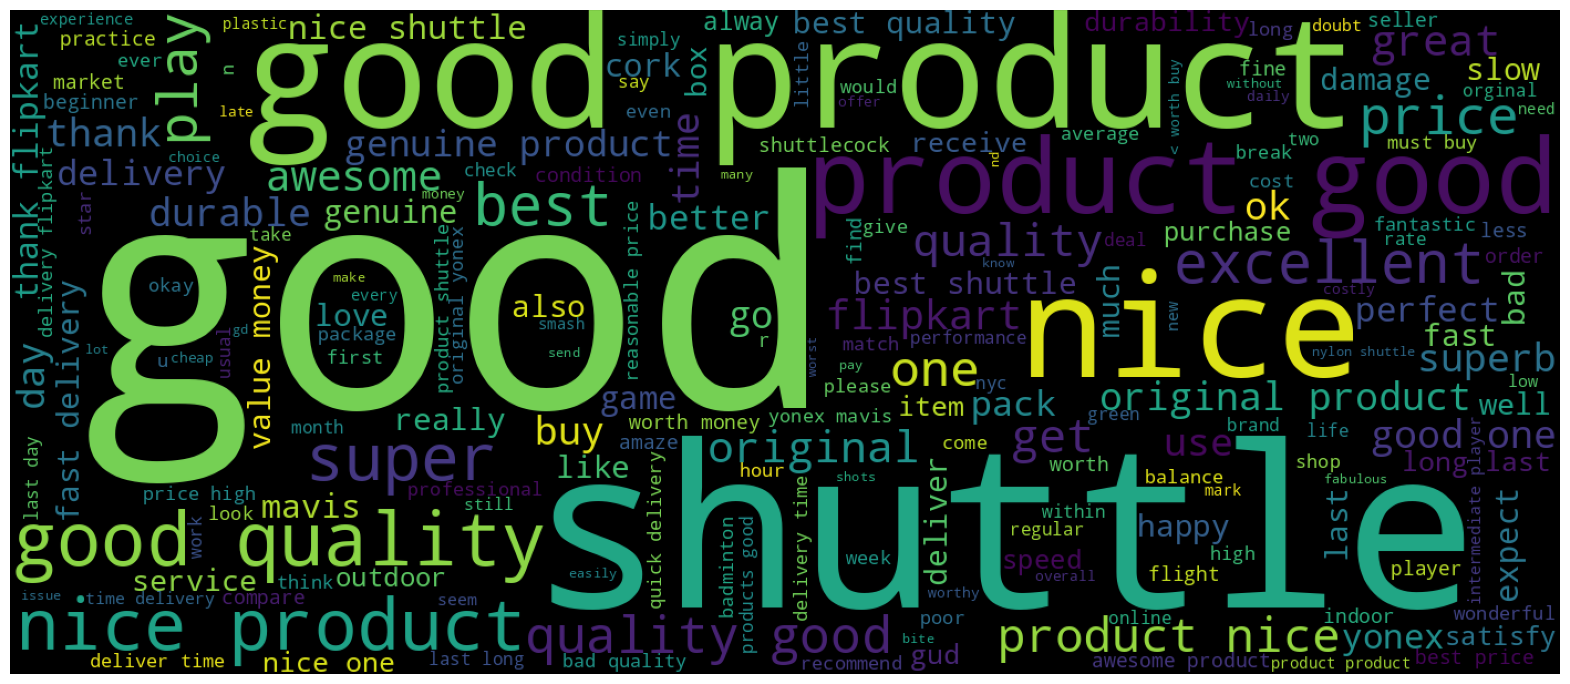

In [ ]:
plt.figure(1,figsize=(20,15))
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
X_train.head()

,Review text,Cleaned Review Text
1372,Very good.,good
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...
333,Nice product. .,nice product
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...
3532,Better,better


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer_bow = CountVectorizer()

# Fit-transform the 'Review text' columns
X_train_bow_text = vectorizer_bow.fit_transform(X_train['Cleaned Review Text'])

In [ ]:
X_train_bow_text

<6806x2054 sparse matrix of type '<class 'numpy.int64'>'
	with 22715 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of train features:", type(X_train_bow_text))

print("Shape of input data:", X_train_bow_text.shape)

Total unique words: 2054
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6806, 2054)


In [ ]:

X_train_bow_text_array = X_train_bow_text.toarray()

In [ ]:
print(X_train_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer_tfidf = TfidfVectorizer()

# Fit-transform the 'Review Title' and 'Review text' columns

X_train_tfidf_text = vectorizer_tfidf.fit_transform(X_train['Cleaned Review Text'])

In [ ]:

X_train_tfidf_text_array = X_train_tfidf_text.toarray()

In [ ]:
print(X_train_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from gensim.models import Word2Vec


# Train Word2Vec model for cleaned review text
word2vec_model_text = Word2Vec(sentences=X_train['Cleaned Review Text'].apply(lambda x: word_tokenize(x.lower())),
                               vector_size=100, window=5, min_count=1, workers=4)

# Function to get Word2Vec vectors for a sentence
def get_word2vec_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word])
    return vectors


# Apply the get_word2vec_vectors function to each row of the DataFrame for cleaned review text
X_train['Word2Vec Vectors Text'] = X_train['Cleaned Review Text'].apply(lambda x: get_word2vec_vectors(word2vec_model_text, word_tokenize(x.lower())))

X_train.head()


,Review text,Cleaned Review Text,Word2Vec Vectors Text
1372,Very good.,good,"[[-0.04289821, 0.40916702, -0.008032675, 0.095..."
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...,"[[-0.05667179, 0.52928245, -0.011267604, 0.122..."
333,Nice product. .,nice product,"[[-0.034859188, 0.2715669, -0.0067260535, 0.05..."
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...,"[[-0.030013435, 0.3083257, -0.009830364, 0.070..."
3532,Better,better,"[[-0.05524679, 0.5193418, -0.025405796, 0.1024..."


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize BERT tokenizer and model (assuming 'bert_model' is your BERT model)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate BERT embeddings for a given text
def get_bert_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.numpy()

# Apply BERT to the cleaned review text columns

X_train['Word2Vec Vectors Text'] = X_train['Cleaned Review Text'].apply(get_bert_embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define function to transform text using BERT
def transform_bert(text):
    # Tokenize text
    tokens = tokenizer.tokenize(text)
    # Add [CLS] and [SEP] tokens
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    # Convert tokens to IDs
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    # Convert token IDs to tensor
    tokens_tensor = torch.tensor([token_ids])
    # Get BERT model output
    with torch.no_grad():
        output = model(tokens_tensor)
    # Use the output as the BERT-transformed vectors
    return output[0].numpy()

# Now you can use the transform_bert function to transform your text data

X_train['BERT Vectors Text'] = X_train['Cleaned Review Text'].apply(transform_bert)


In [ ]:
X_train.head()

,Review text,Cleaned Review Text,Word2Vec Vectors Text,BERT Vectors Text
1372,Very good.,good,"[[-0.011720186, 0.279475, -0.18893147, -0.0746...","[[[-0.011720186, 0.279475, -0.18893147, -0.074..."
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...,"[[-0.68895215, -0.30904862, 0.21015492, 0.0635...","[[[-0.68895215, -0.30904862, 0.21015492, 0.063..."
333,Nice product. .,nice product,"[[-0.046039082, 0.12879884, -0.022033023, 0.11...","[[[-0.046039082, 0.12879884, -0.022033023, 0.1..."
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...,"[[-0.5564443, -0.057293426, 0.37505117, -0.457...","[[[-0.5564443, -0.057293426, 0.37505117, -0.45..."
3532,Better,better,"[[-0.15331234, 0.17859156, -0.19772704, -0.026...","[[[-0.15331234, 0.17859156, -0.19772704, -0.02..."


In [ ]:
# Apply the preprocess_review function to each row of the DataFrame

X_test['Cleaned Review Text'] = X_test['Review text'].apply(preprocess_review)

X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [ ]:
# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Fit the CountVectorizer with the training data
X_train_bow_text = bow_vectorizer.fit_transform(X_train['Cleaned Review Text'])

# Transform the test data using the fitted CountVectorizer
X_test_bow_text = bow_vectorizer.transform(X_test['Cleaned Review Text'])

In [ ]:
X_test_bow_text

<1702x442 sparse matrix of type '<class 'numpy.int64'>'
	with 5051 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of test features:", type(X_test_bow_text))

print("Shape of input data:", X_test_bow_text.shape)

Total unique words: 2054
Type of test features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1702, 442)


In [ ]:

X_test_bow_text_array = X_test_bow_text.toarray()

In [ ]:
print(X_test_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Fit-transform the 'Review text' columns

X_test_tfidf_text = vectorizer_tfidf.transform(X_test['Cleaned Review Text'])

In [ ]:

X_test_tfidf_text_array = X_test_tfidf_text.toarray()

In [ ]:
print(X_test_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [ ]:

# Apply the get_word2vec_vectors function to each row of the DataFrame for cleaned review text
X_test['Word2Vec Vectors Text'] = X_test['Cleaned Review Text'].apply(lambda x: get_word2vec_vectors(word2vec_model_text, word_tokenize(x.lower())))

X_test.head()


,Review text,Cleaned Review Text,Word2Vec Vectors Text
4392,Not good,not good,"[[-0.077452615, 0.6701047, -0.02430718, 0.1280..."
8422,Good product in right app......,good product right app,"[[-0.04289821, 0.40916702, -0.008032675, 0.095..."
2138,Very good quality,good quality,"[[-0.04289821, 0.40916702, -0.008032675, 0.095..."
3538,Good,good,"[[-0.04289821, 0.40916702, -0.008032675, 0.095..."
2684,Thanks,thank,"[[-0.022584299, 0.3265448, -0.017568264, 0.077..."


In [ ]:
X_test.shape

(1702, 3)

In [ ]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    # Tokenize the text and convert it into BERT input format
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    # Get the BERT model outputs
    with torch.no_grad():
        outputs = model(**tokens)
    # Extract the embeddings (mean of the last hidden state)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

# Apply BERT embeddings to 'Cleaned Review Text'

X_test['BERT Vectors Text'] = X_test['Cleaned Review Text'].apply(get_bert_embeddings)


In [ ]:
X_test.head()


,Review text,Cleaned Review Text,Word2Vec Vectors Text,BERT Vectors Text
4392,Not good,not good,"[[-0.077452615, 0.6701047, -0.02430718, 0.1280...","[[0.09729388, -0.059155606, -0.42650104, -0.01..."
8422,Good product in right app......,good product right app,"[[-0.04289821, 0.40916702, -0.008032675, 0.095...","[[0.12034265, -0.2856672, 0.08370151, 0.087511..."
2138,Very good quality,good quality,"[[-0.04289821, 0.40916702, -0.008032675, 0.095...","[[-0.11066526, -0.06563719, -0.22037838, 0.081..."
3538,Good,good,"[[-0.04289821, 0.40916702, -0.008032675, 0.095...","[[0.54200697, 0.25360748, -0.20783357, 0.06066..."
2684,Thanks,thank,"[[-0.022584299, 0.3265448, -0.017568264, 0.077...","[[0.2042374, 0.25601006, 0.21551122, 0.0172451..."


In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

CPU times: user 1.49 s, sys: 127 ms, total: 1.62 s
Wall time: 846 ms
Train Accuracy: 0.9585659712018807
Test Accuracy: 0.9247943595769683


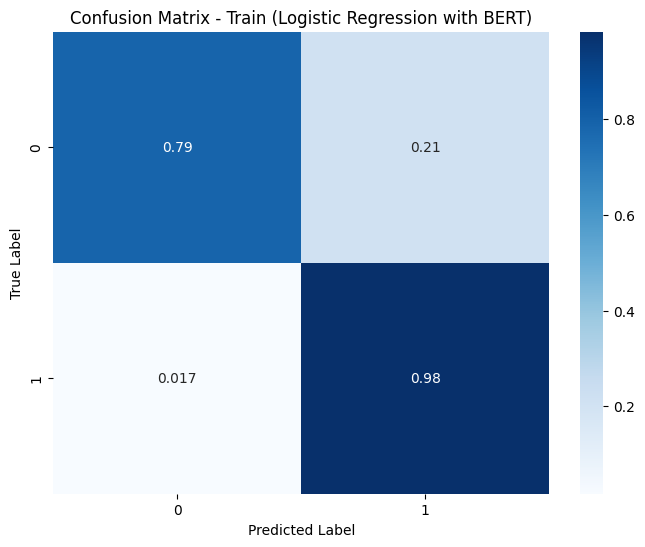

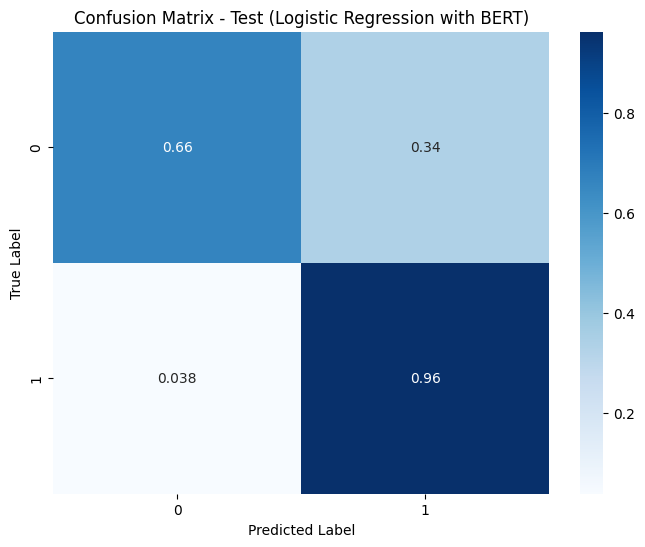

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Memory

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Load the BERT embeddings for train and test data
X_train_bert = X_train['BERT Vectors Text'].to_list()
X_test_bert = X_test['BERT Vectors Text'].to_list()

# Reshape the BERT embeddings
X_train_bert = np.array(X_train_bert).reshape(len(X_train_bert), -1)
X_test_bert = np.array(X_test_bert).reshape(len(X_test_bert), -1)

# Logistic Regression with BERT
log_reg = LogisticRegression()
%time log_reg.fit(X_train_bert, y_train)

# Calculate train and test accuracy
y_train_pred = log_reg.predict(X_train_bert)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

y_test_pred = log_reg.predict(X_test_bert)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot confusion matrix for train data
train_cm = confusion_matrix(y_train, y_train_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Train (Logistic Regression with BERT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for test data
test_cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Test (Logistic Regression with BERT)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import Memory
import time

# Define a memory cache to speed up the process
memory = Memory(location='cachedir', verbose=0)

# Create Bag-of-Words vectorizer
bow_vectorizer = CountVectorizer()

# Define pipelines for each model
log_reg_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('model', LogisticRegression())
])

knn_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('model', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('model', RandomForestClassifier())
])

nb_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('model', MultinomialNB())
])

# Define hyperparameter grids for each model
param_grid_log_reg = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'model__C': [0.1, 1, 10]
}

param_grid_knn = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'model__n_neighbors': [3, 5, 7]
}

param_grid_rf = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'model__n_estimators': [100, 200, 300]
}

param_grid_nb = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'model__alpha': [0.1, 1, 10]
}

# Initialize GridSearchCV for each model
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, cv=5, n_jobs=-1)
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
grid_search_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5, n_jobs=-1)

# Measure and print training time and training accuracy for Logistic Regression
start_time = time.time()
grid_search_log_reg.fit(X_train['Cleaned Review Text'], y_train)
training_time_log_reg = time.time() - start_time
training_accuracy_log_reg = grid_search_log_reg.best_score_

# Measure and print training time and training accuracy for KNN
start_time = time.time()
grid_search_knn.fit(X_train['Cleaned Review Text'], y_train)
training_time_knn = time.time() - start_time
training_accuracy_knn = grid_search_knn.best_score_

# Measure and print training time and training accuracy for Random Forest
start_time = time.time()
grid_search_rf.fit(X_train['Cleaned Review Text'], y_train)
training_time_rf = time.time() - start_time
training_accuracy_rf = grid_search_rf.best_score_

# Measure and print training time and training accuracy for Naive Bayes
start_time = time.time()
grid_search_nb.fit(X_train['Cleaned Review Text'], y_train)
training_time_nb = time.time() - start_time
training_accuracy_nb = grid_search_nb.best_score_

# Make predictions and print results for Logistic Regression
y_pred_log_reg = grid_search_log_reg.predict(X_test['Cleaned Review Text'])
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression - Training Accuracy: %.4f" % training_accuracy_log_reg)
print("Logistic Regression - Test Accuracy: %.4f" % accuracy_log_reg)
print("Logistic Regression - Training Time: %.2f seconds" % training_time_log_reg)
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Make predictions and print results for KNN
y_pred_knn = grid_search_knn.predict(X_test['Cleaned Review Text'])
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN - Training Accuracy: %.4f" % training_accuracy_knn)
print("KNN - Test Accuracy: %.4f" % accuracy_knn)
print("KNN - Training Time: %.2f seconds" % training_time_knn)
print("KNN - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

# Make predictions and print results for Random Forest
y_pred_rf = grid_search_rf.predict(X_test['Cleaned Review Text'])
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest - Training Accuracy: %.4f" % training_accuracy_rf)
print("Random Forest - Test Accuracy: %.4f" % accuracy_rf)
print("Random Forest - Training Time: %.2f seconds" % training_time_rf)
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

# Make predictions and print results for Naive Bayes
y_pred_nb = grid_search_nb.predict(X_test['Cleaned Review Text'])
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes - Training Accuracy: %.4f" % training_accuracy_nb)
print("Naive Bayes - Test Accuracy: %.4f" % accuracy_nb)
print("Naive Bayes - Training Time: %.2f seconds" % training_time_nb)
print("Naive Bayes - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))


Logistic Regression - Training Accuracy: 0.9220
Logistic Regression - Test Accuracy: 0.9189
Logistic Regression - Training Time: 11.25 seconds
Logistic Regression - Confusion Matrix:
 [[ 117   94]
 [  44 1447]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       211
           1       0.94      0.97      0.95      1491

    accuracy                           0.92      1702
   macro avg       0.83      0.76      0.79      1702
weighted avg       0.91      0.92      0.91      1702


KNN - Training Accuracy: 0.9236
KNN - Test Accuracy: 0.9172
KNN - Training Time: 16.61 seconds
KNN - Confusion Matrix:
 [[ 121   90]
 [  51 1440]]
KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63       211
           1       0.94      0.97      0.95      1491

    accuracy                           0.92      1702
   macro avg       0

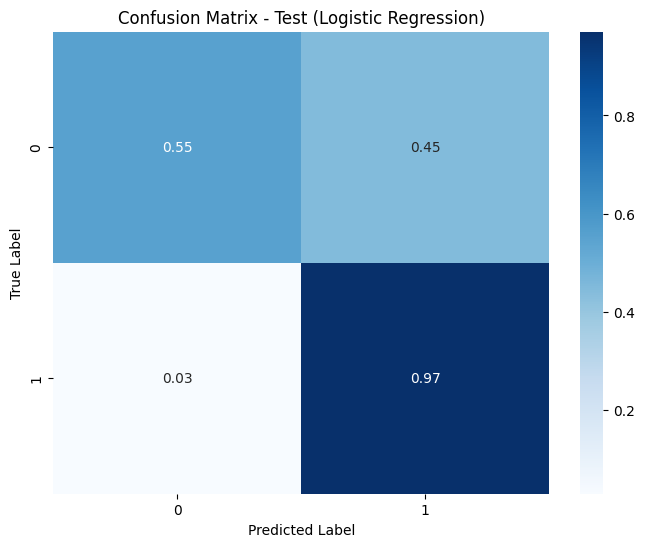

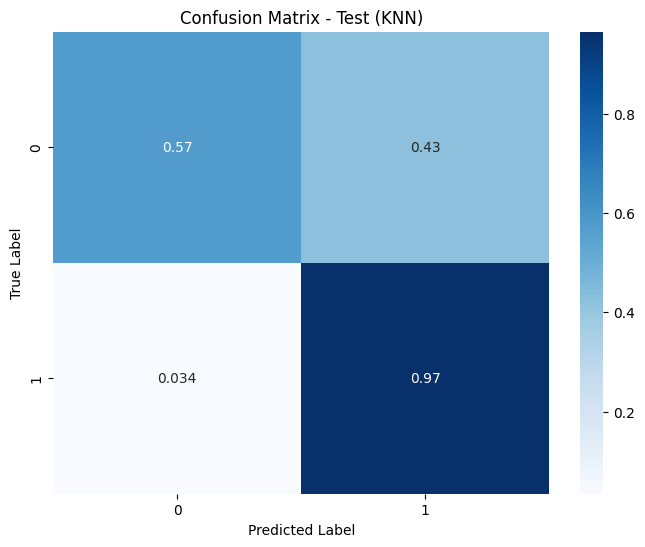

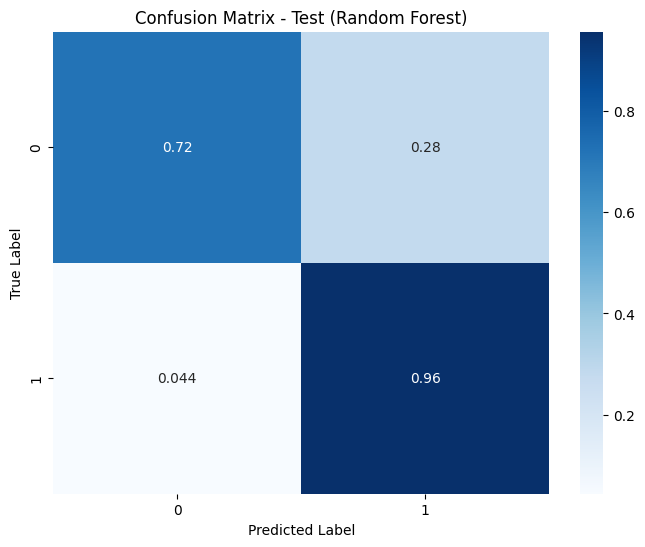

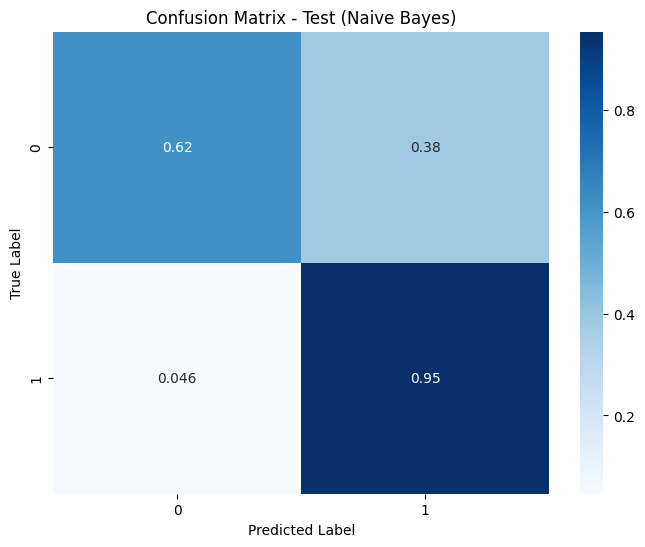

In [ ]:
# Plot confusion matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Test (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for KNN
knn_cm = confusion_matrix(y_test, y_pred_knn, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Test (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Test (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Test (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Logistic Regression - Train Score: 0.9295, Test Score: 0.9242


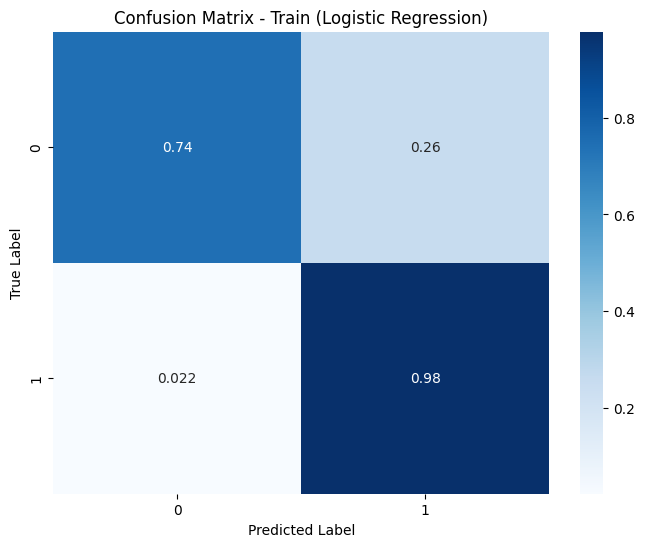

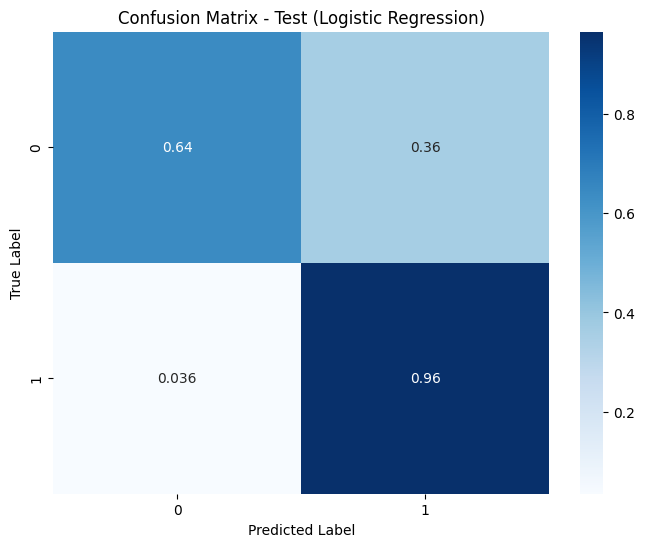

KNN - Train Score: 0.9120, Test Score: 0.9095


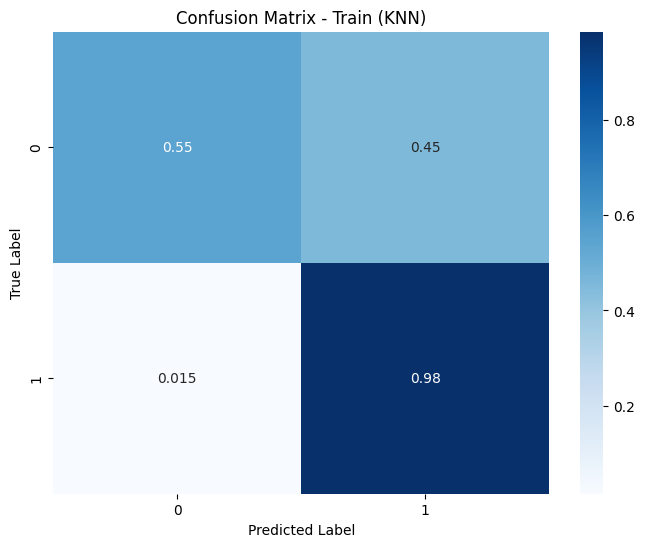

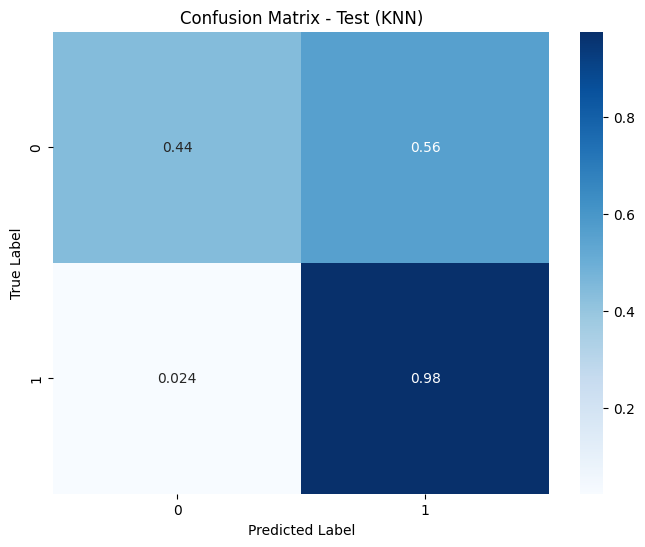

Random Forest - Train Score: 0.9340, Test Score: 0.9318


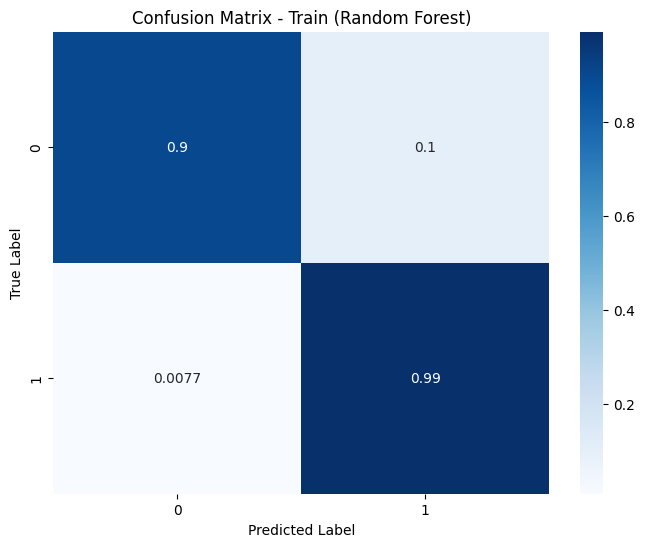

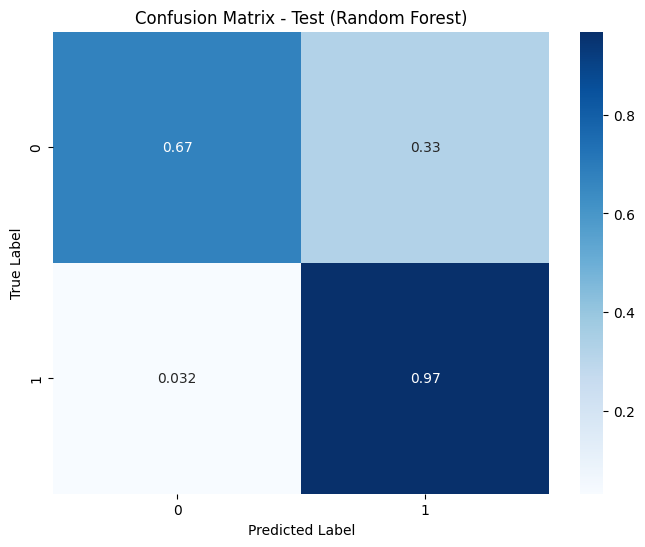

Naive Bayes - Train Score: 0.9193, Test Score: 0.9130


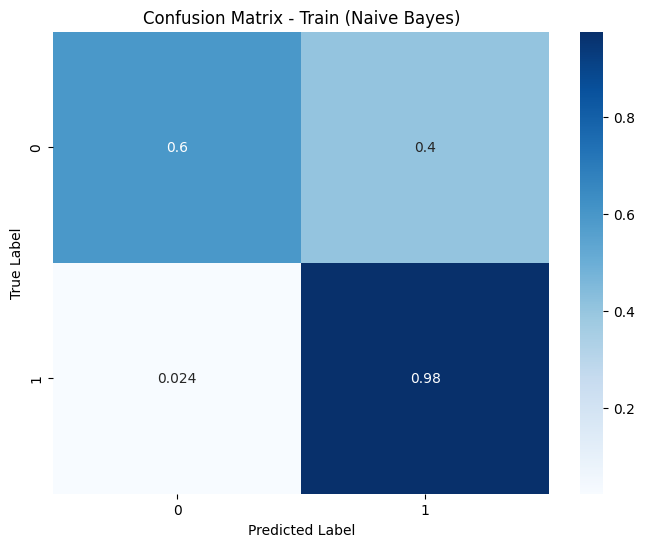

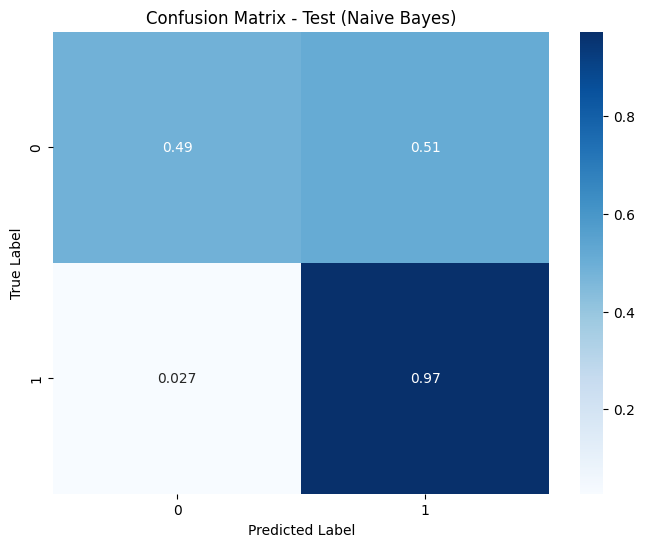

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Define pipelines for each model
log_reg_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', LogisticRegression())
])

knn_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', RandomForestClassifier())
])

nb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', MultinomialNB())
])

# Define hyperparameter grids for each model
param_grid_log_reg = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7]
}

param_grid_rf = {
    'clf__n_estimators': [100, 200, 300]
}

param_grid_nb = {
    'clf__alpha': [0.1, 1, 10]
}

# Initialize GridSearchCV for each model
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, cv=5)
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5)
grid_search_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5)

# Fit the models
grid_search_log_reg.fit(X_train['Cleaned Review Text'], y_train)
grid_search_knn.fit(X_train['Cleaned Review Text'], y_train)
grid_search_rf.fit(X_train['Cleaned Review Text'], y_train)
grid_search_nb.fit(X_train['Cleaned Review Text'], y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Calculate train and test scores, and plot confusion matrices
models = {
    'Logistic Regression': grid_search_log_reg,
    'KNN': grid_search_knn,
    'Random Forest': grid_search_rf,
    'Naive Bayes': grid_search_nb
}

for model_name, model in models.items():
    train_score = model.best_score_
    test_score = model.score(X_test['Cleaned Review Text'], y_test)
    print(f"{model_name} - Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")

    y_train_pred = model.predict(X_train['Cleaned Review Text'])
    plot_confusion_matrix(y_train, y_train_pred, f"Confusion Matrix - Train ({model_name})")

    y_test_pred = model.predict(X_test['Cleaned Review Text'])
    plot_confusion_matrix(y_test, y_test_pred, f"Confusion Matrix - Test ({model_name})")


CPU times: user 5.99 s, sys: 39.6 ms, total: 6.03 s
Wall time: 7.58 s
CPU times: user 10 s, sys: 26.5 ms, total: 10.1 s
Wall time: 8.82 s
CPU times: user 42.1 s, sys: 84.3 ms, total: 42.2 s
Wall time: 42.9 s
CPU times: user 768 ms, sys: 990 µs, total: 769 ms
Wall time: 771 ms
Logistic Regression - Train Score: 0.9295, Test Score: 0.9242


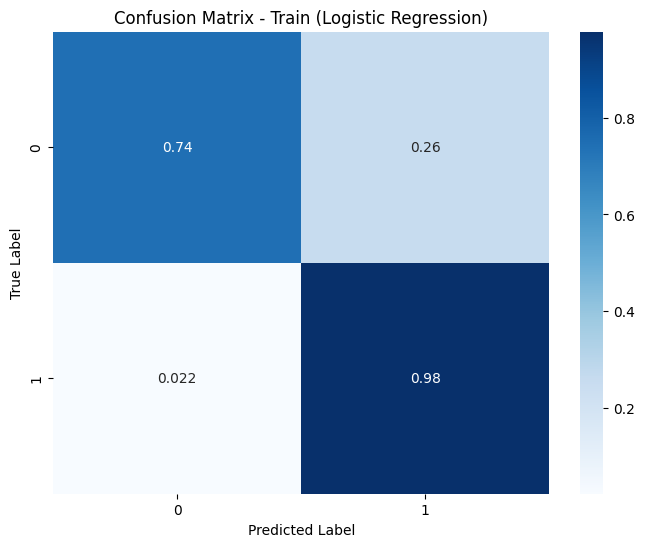

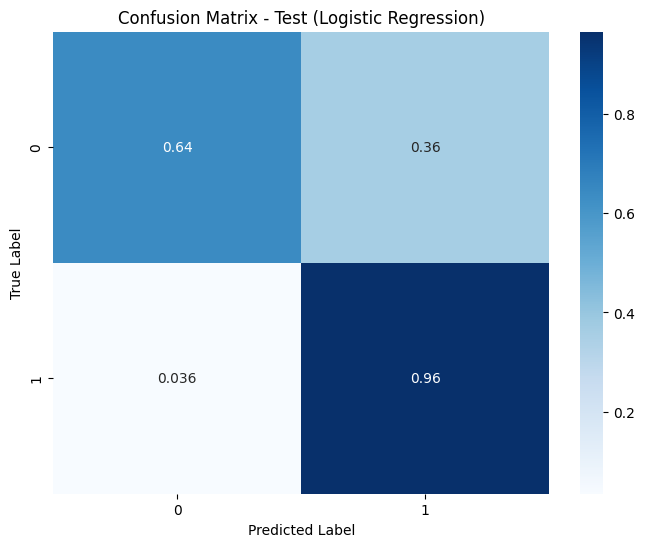

KNN - Train Score: 0.9120, Test Score: 0.9095


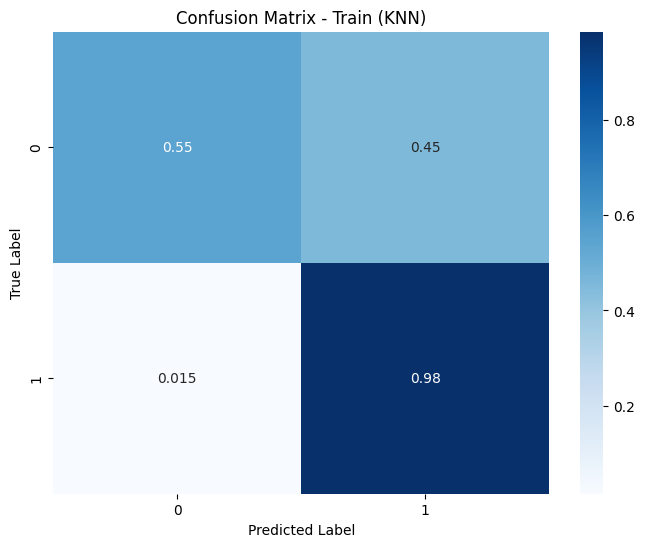

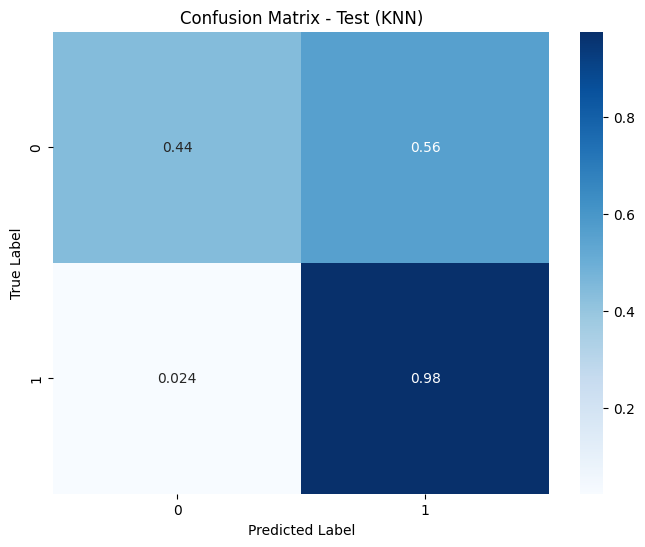

Random Forest - Train Score: 0.9336, Test Score: 0.9271


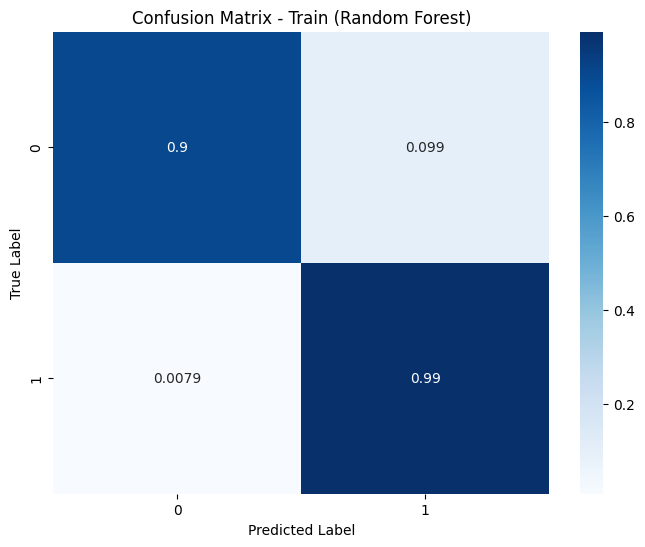

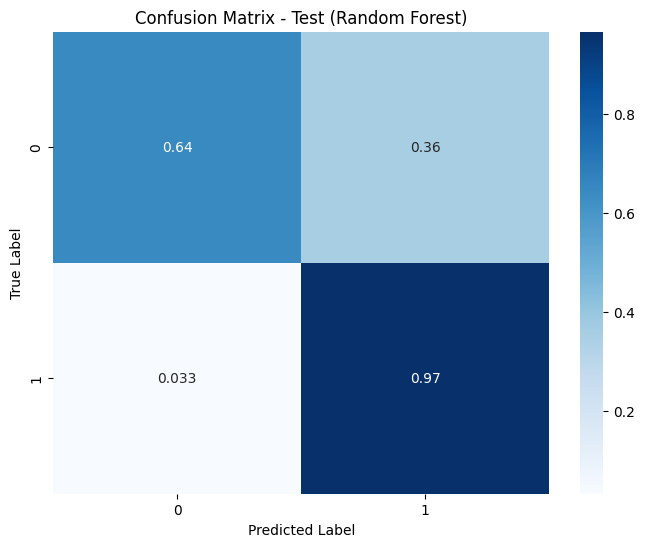

Naive Bayes - Train Score: 0.9193, Test Score: 0.9130


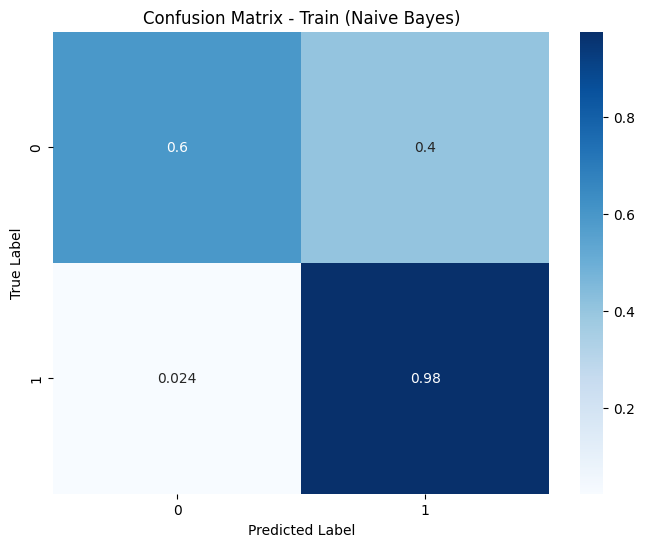

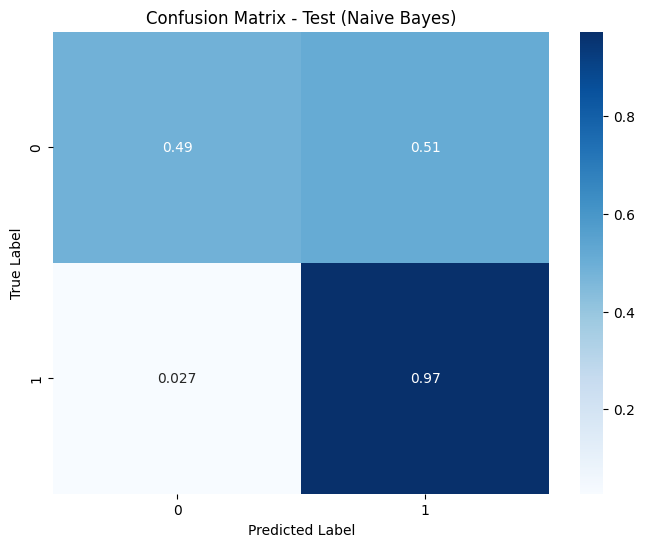

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Define pipelines for each model
log_reg_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', LogisticRegression())
])

knn_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', RandomForestClassifier())
])

nb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', MultinomialNB())
])

# Define hyperparameter grids for each model
param_grid_log_reg = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7]
}

param_grid_rf = {
    'clf__n_estimators': [100, 200, 300]
}

param_grid_nb = {
    'clf__alpha': [0.1, 1, 10]
}

# Initialize GridSearchCV for each model
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, cv=5)
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5)
grid_search_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5)

# Fit the models
%time grid_search_log_reg.fit(X_train['Cleaned Review Text'], y_train)
%time grid_search_knn.fit(X_train['Cleaned Review Text'], y_train)
%time grid_search_rf.fit(X_train['Cleaned Review Text'], y_train)
%time grid_search_nb.fit(X_train['Cleaned Review Text'], y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Calculate train and test scores, and plot confusion matrices
models = {
    'Logistic Regression': grid_search_log_reg,
    'KNN': grid_search_knn,
    'Random Forest': grid_search_rf,
    'Naive Bayes': grid_search_nb
}

for model_name, model in models.items():
    train_score = model.best_score_
    test_score = model.score(X_test['Cleaned Review Text'], y_test)
    print(f"{model_name} - Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")

    y_train_pred = model.predict(X_train['Cleaned Review Text'])
    plot_confusion_matrix(y_train, y_train_pred, f"Confusion Matrix - Train ({model_name})")

    y_test_pred = model.predict(X_test['Cleaned Review Text'])
    plot_confusion_matrix(y_test, y_test_pred, f"Confusion Matrix - Test ({model_name})")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# Create Bag-of-Words vectorizer
bow_vectorizer = CountVectorizer()

# Define pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('model', MultinomialNB())
])

# Define hyperparameter grid for Naive Bayes
param_grid_nb = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'model__alpha': [0.1, 1, 10]
}

# Initialize GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5, n_jobs=-1)

# Measure and print training time and training accuracy for Naive Bayes
start_time = time.time()
grid_search_nb.fit(X_train['Cleaned Review Text'], y_train)
training_time_nb = time.time() - start_time
training_accuracy_nb = grid_search_nb.best_score_

# Make predictions and print results for Naive Bayes
y_pred_nb = grid_search_nb.predict(X_test['Cleaned Review Text'])
testing_time_nb = time.time() - start_time
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes - Training Accuracy: %.4f" % training_accuracy_nb)
print("Naive Bayes - Test Accuracy: %.4f" % accuracy_nb)
print("Naive Bayes - Training Time: %.2f seconds" % training_time_nb)
print("Naive Bayes - Testing Time: %.2f seconds" % testing_time_nb)


Naive Bayes - Training Accuracy: 0.9201
Naive Bayes - Test Accuracy: 0.9119
Naive Bayes - Training Time: 5.19 seconds
Naive Bayes - Testing Time: 5.22 seconds


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Define Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', MultinomialNB())
])

# Define hyperparameter grid for Naive Bayes
param_grid_nb = {
    'clf__alpha': [0.1, 1, 10]
}

# Initialize GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5)

# Fit the Naive Bayes model
start_time = time.time()
grid_search_nb.fit(X_train['Cleaned Review Text'], y_train)
training_time_nb = time.time() - start_time

# Print the training time
print("Naive Bayes - Training Time: %.2f seconds" % training_time_nb)

# Print the best parameters
print("Naive Bayes - Best Parameters:", grid_search_nb.best_params_)

# Print the training and testing accuracy
train_score_nb = grid_search_nb.best_score_
test_score_nb = grid_search_nb.score(X_test['Cleaned Review Text'], y_test)
print("Naive Bayes - Train Score: %.4f, Test Score: %.4f" % (train_score_nb, test_score_nb))
print("Naive Bayes - Training Time: %.2f seconds" % training_time_nb)
print("Naive Bayes - Testing Time: %.2f seconds" % testing_time_nb)

Naive Bayes - Training Time: 1.41 seconds
Naive Bayes - Best Parameters: {'clf__alpha': 0.1}
Naive Bayes - Train Score: 0.9193, Test Score: 0.9130
Naive Bayes - Training Time: 1.41 seconds
Naive Bayes - Testing Time: 5.22 seconds


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Define Logistic Regression pipeline
log_reg_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('clf', LogisticRegression())
])

# Define hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, cv=5)

# Fit the Logistic Regression model
start_time = time.time()
grid_search_log_reg.fit(X_train['Cleaned Review Text'], y_train)
training_time_log_reg = time.time() - start_time

# Print the training time
print("Logistic Regression - Training Time: %.2f seconds" % training_time_log_reg)

# Print the best parameters
print("Logistic Regression - Best Parameters:", grid_search_log_reg.best_params_)

# Print the training and testing accuracy
train_score_log_reg = grid_search_log_reg.best_score_
test_score_log_reg = grid_search_log_reg.score(X_test['Cleaned Review Text'], y_test)
print("Logistic Regression - Train Score: %.4f, Test Score: %.4f" % (train_score_log_reg, test_score_log_reg))


Logistic Regression - Training Time: 6.61 seconds
Logistic Regression - Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2'}
Logistic Regression - Train Score: 0.9295, Test Score: 0.9242


In [ ]:
import pickle

# Save the trained CountVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the trained TF-IDF Vectorizer
with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow_vectorizer, f)

# Save the trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(grid_search_log_reg.best_estimator_, f)

# Save the trained Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(grid_search_nb.best_estimator_, f)


In [ ]:
import pickle

# Save the trained Logistic Regression model
with open('logistic_regression_bert_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)


In [198]:
import pickle
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load the saved Logistic Regression model
with open('logistic_regression_bert_model.pkl', 'rb') as f:
    log_reg = pickle.load(f)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a review
def get_bert_embeddings(review):
    tokens = tokenizer(review, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings

# Example new review
new_review = "the product quality is not good it is damaging at the bottom"
# Get BERT embeddings for the new review
new_review_embeddings = get_bert_embeddings(new_review)

# Reshape the embeddings
new_review_embeddings = new_review_embeddings.reshape(1, -1)

# Use the model to predict the sentiment
prediction = log_reg.predict(new_review_embeddings)[0]
if prediction == 1:
    print("Positive review")
else:
    print("Negative review")


Positive review


In [205]:
import pickle
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load the saved Logistic Regression model
with open('logistic_regression_bert_model.pkl', 'rb') as f:
    log_reg = pickle.load(f)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a review
def get_bert_embeddings(review):
    tokens = tokenizer(review, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings

# Example new review
new_review = "Initially worthwhile investment, but depreciated in value over time."

# Get BERT embeddings for the new review
new_review_embeddings = get_bert_embeddings(new_review)

# Reshape the embeddings
new_review_embeddings = new_review_embeddings.reshape(1, -1)

# Use the model to predict the sentiment
prediction = log_reg.predict(new_review_embeddings)[0]
if prediction == 1:
    print("Positive review")
else:
    print("Negative review")

Positive review


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Join tokens back into text
    text = ' '.join(filtered_text)

    return text

# Example usage
new_review = "poor quality, not good"
cleaned_review = preprocess_text(new_review)
print("Cleaned Review:", cleaned_review)


Cleaned Review: poor quality good


In [ ]:
# Preprocess the new review
new_review = "poor quality and not good"
cleaned_review = preprocess_review(new_review)

# Predict the sentiment of the new review
predicted_sentiment = grid_search_nb.predict([cleaned_review])

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment[0])


Predicted Sentiment: 0


In [ ]:
# Preprocess the new review
new_review = "poor quality and not good"
cleaned_review = preprocess_review(new_review)

# Predict the sentiment of the new review
predicted_sentiment = grid_search_nb.predict([cleaned_review])

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: 0


In [ ]:

# Preprocess the new review
new_review = "not delivered on time"
cleaned_review = preprocess_review(new_review)

# Predict the sentiment of the new review
predicted_sentiment = grid_search_nb.predict([cleaned_review])

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: 1


BoW Test Accuracy: 0.917743830787309


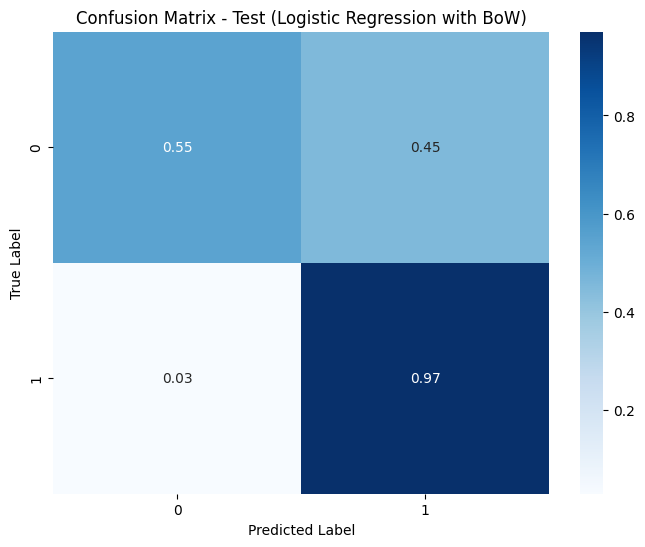

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Create Bag-of-Words (BoW) pipeline
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', LogisticRegression())
])

# Fit the model
bow_pipeline.fit(X_train['Cleaned Review Text'], y_train)

# Make predictions
y_pred_bow = bow_pipeline.predict(X_test['Cleaned Review Text'])

# Calculate accuracy
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("BoW Test Accuracy:", accuracy_bow)

# Plot confusion matrix
cm_bow = confusion_matrix(y_test, y_pred_bow, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test (Logistic Regression with BoW)')
plt.show()


In [ ]:
new_review = "poor quality"
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)


Predicted Label (BoW): [0]


In [ ]:
new_review = "not delivered on time"
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)

Predicted Label (BoW): [0]


TF-IDF Test Accuracy: 0.9206815511163338


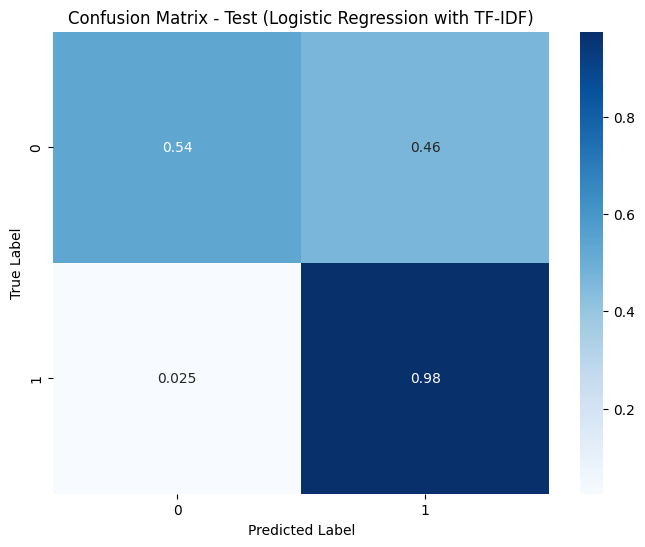

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Create TF-IDF pipeline
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Fit the model
tfidf_pipeline.fit(X_train['Cleaned Review Text'], y_train)

# Make predictions
y_pred_tfidf = tfidf_pipeline.predict(X_test['Cleaned Review Text'])

# Calculate accuracy
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("TF-IDF Test Accuracy:", accuracy_tfidf)

# Plot confusion matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test (Logistic Regression with TF-IDF)')
plt.show()


In [ ]:
new_review = "not good"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)


Predicted Label (TF-IDF): [0]


In [ ]:
new_review = "not delivered on time"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [0]


In [ ]:
new_review = "not wrost"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [1]


In [ ]:
rnew_review = "very worst"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [0]


In [ ]:
new_review = "dont recommended"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [0]


In [ ]:
new_review = "recommended"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [1]


In [ ]:
new_review =  "I not stay here again."
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)

Predicted Label (BoW): [0]


In [ ]:
new_review =  "I stay here again."
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)

Predicted Label (BoW): [1]


In [ ]:
new_review = "I've been using these shuttlecocks for months now and they still hold up well. The feathers are high-quality and the flight is smooth and accurate."
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)

Predicted Label (BoW): [1]


In [ ]:
new_review = "I wouldn't miss this opportunity. It's disappoint!"
predicted_label_tfidf = tfidf_pipeline.predict([new_review])
print("Predicted Label (TF-IDF):", predicted_label_tfidf)

Predicted Label (TF-IDF): [0]


In [ ]:
new_review ="It didn't disappoint!"
predicted_label_bow = bow_pipeline.predict([new_review])
print("Predicted Label (BoW):", predicted_label_bow)


Predicted Label (BoW): [1]


In [203]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True